In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용 가능

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Dataset 확인

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 테이블에서 보다시피, PassenserID 숫자와 다른, 그러니까 null data가 존재하는 열(feature)이 있다.
- 이를 좀 더 보기 편하도록 그래프로 시각화

### 1.1 Null data check

In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%' \
    .format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%' \
    .format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- Train, Test set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data가 존재하는 것을 알 수 있다.
- MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있다.

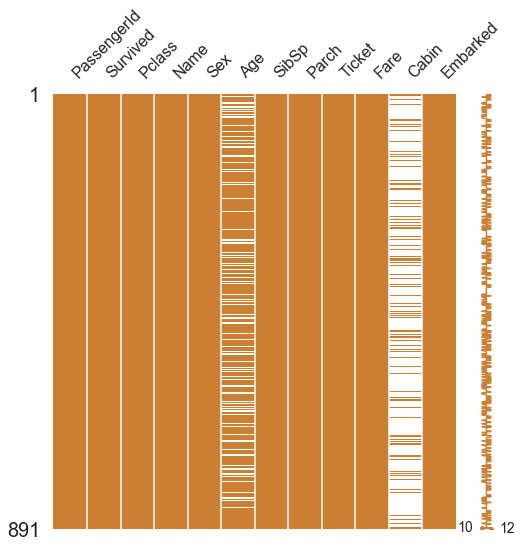

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

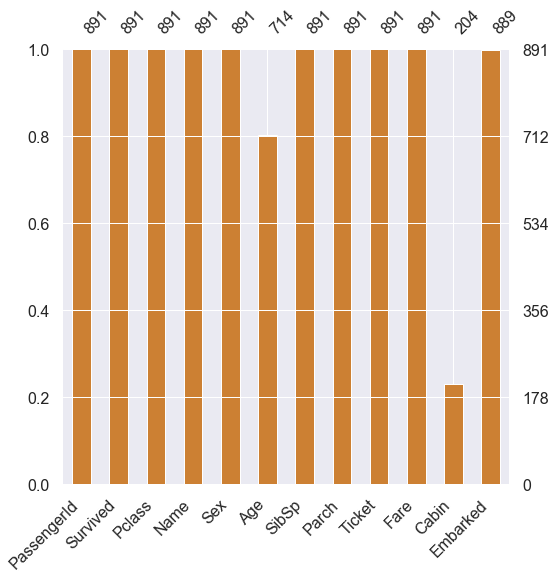

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

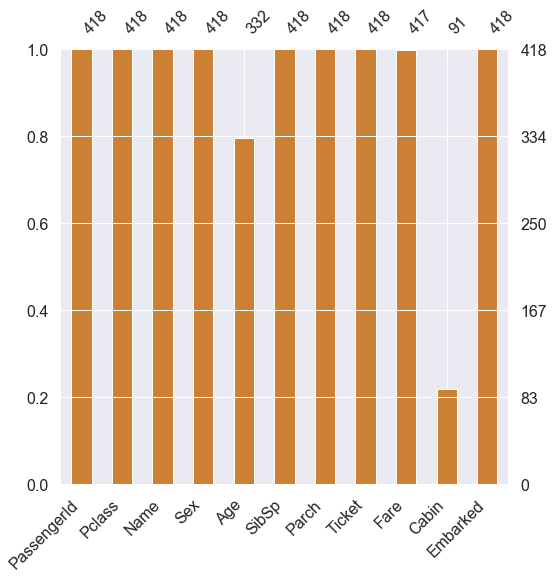

In [10]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2 Target label 확인
- target label 이 어떤 distribution을 가지고 있는지 확인
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있다.

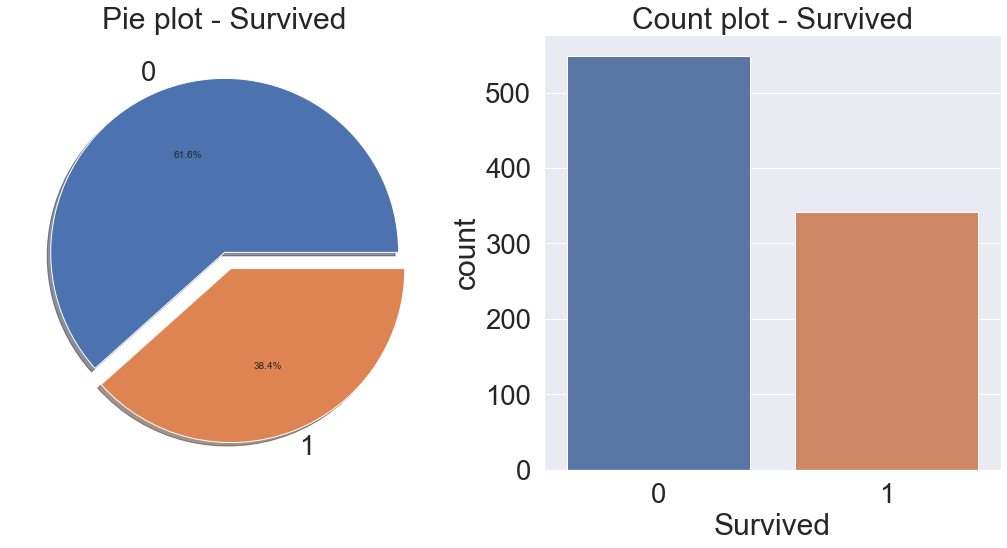

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 안타깝게도 죽은 사람이 많다.
- 38,4%가 살아남았다.
- target label의 분포가 제법 균일(balanced). 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게 된다. 0을 찾는 문제라면 이 모델을 원하는 결과를 줄 수 없게 된다.

## 2. Exploratory data analysis
- 수많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요

### 2.1 Pclass
- Pclass는 ordinal, 서수형 데이터이다. 카테고리이면서, 순서가 있는 데이터 타입이다.
- 먼저 Pclass에 따른 생존률의 차이를 살펴보자. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수 있다. 또한 pivot이라는 메소드도 존재한다.
- 'Pclass', 'Survived'를 가져온 후, pclass로 묶는다. 그러고 나면 각 pclass 마다 0, 1이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나온다.
- 아래와 같이 count()를 하면, 각 class에 몇 명이 있는지 확인할 수 있으며, sum()을 하면, 216명 중 생존한(survived = 1) 사람의 총합을 주게 된다.

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas의 crosstab을 사용하면 위 과정을 좀 더 수월하게 볼 수 있다.

In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있다. (class 1의 경우, 80 / (80+136) = 0.63)

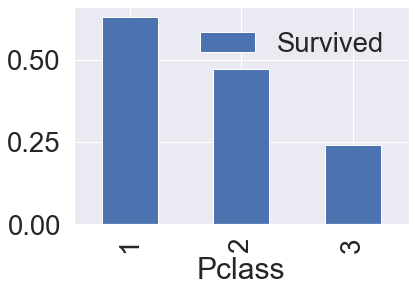

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- Pclass가 높을수록(1st) 생존률이 높다.
- seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해 볼 수 있다.

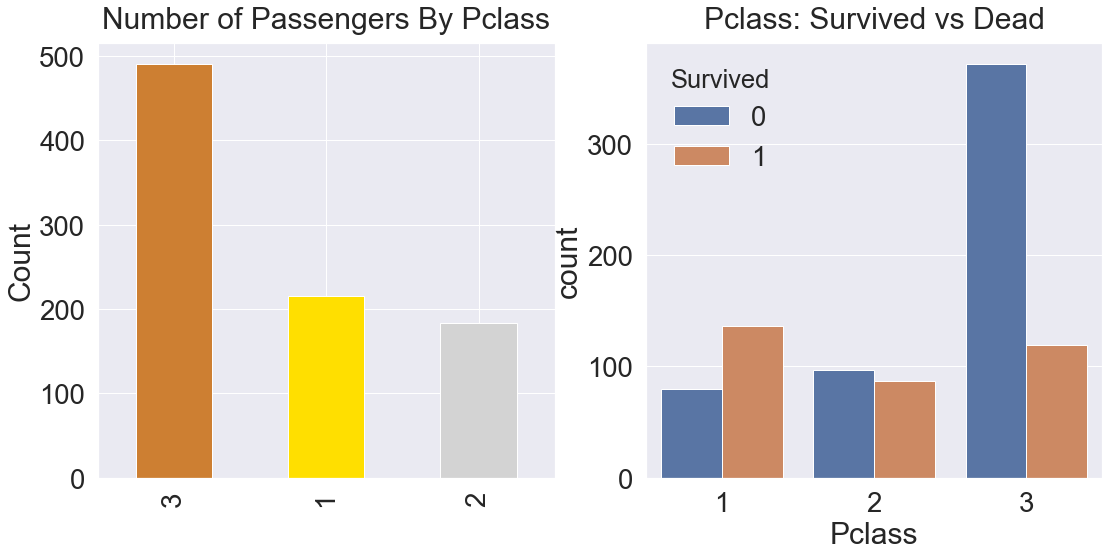

In [16]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을수록, 생존 확률이 높은 걸 확인할 수 있다. Pclass 1, 2, 3 순서대로 63%, 48%, 25% 이다.
- 우리는 생존에 Pclass 가 큰 영향을 미친다고 생각해 볼 수 있으며, 나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단할 수 있다.

### 2.2 Sex
- pandas groupby와 seaborn countplot을 사용해서 시각화

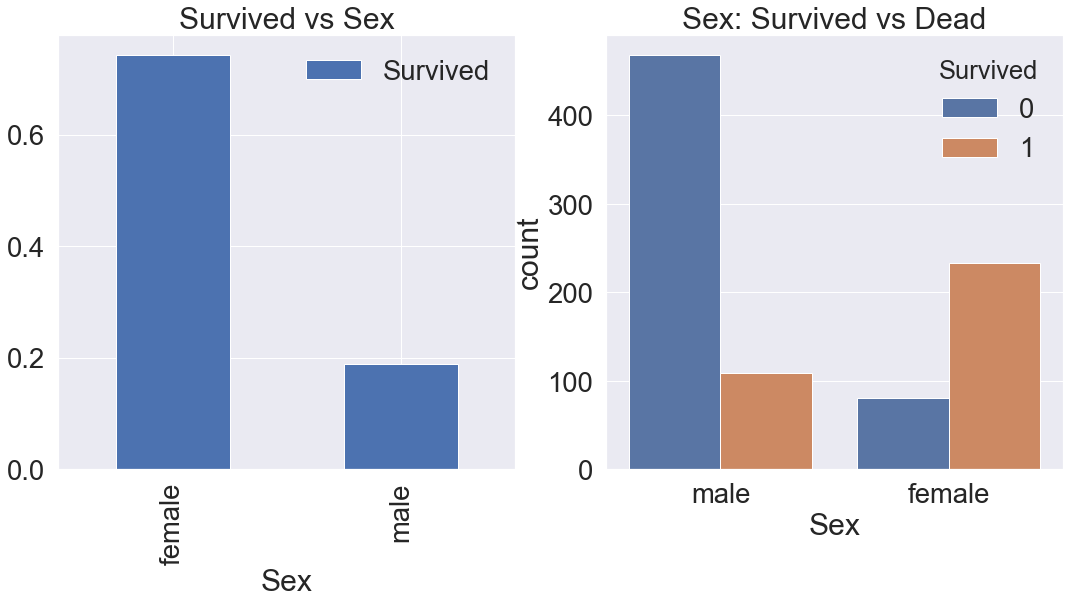

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 남자보다 여자가 생존할 확률이 높다.

In [18]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature 임을 알 수 있다.

### 2.3 Both Sex and Pclass
- Sex, Pclass 두 가지에 관하여 생존률이 어떻게 달라지는지 확인
- seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

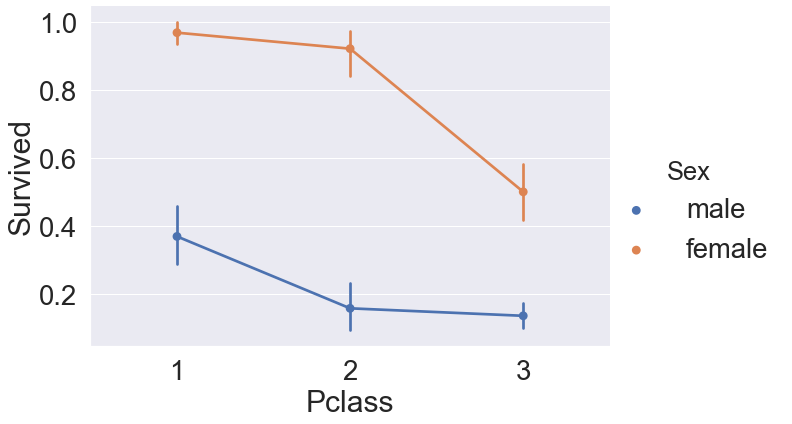

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- 모든 클래스에서 female이 살 확률이 male보다 높은 걸 알 수 있다.
- 또한 남자, 여자 상관없이 클래스가 높을수록 생존 확률이 높다.
- 위 그래프는 hue 대신 column으로 하면 아래와 같다.

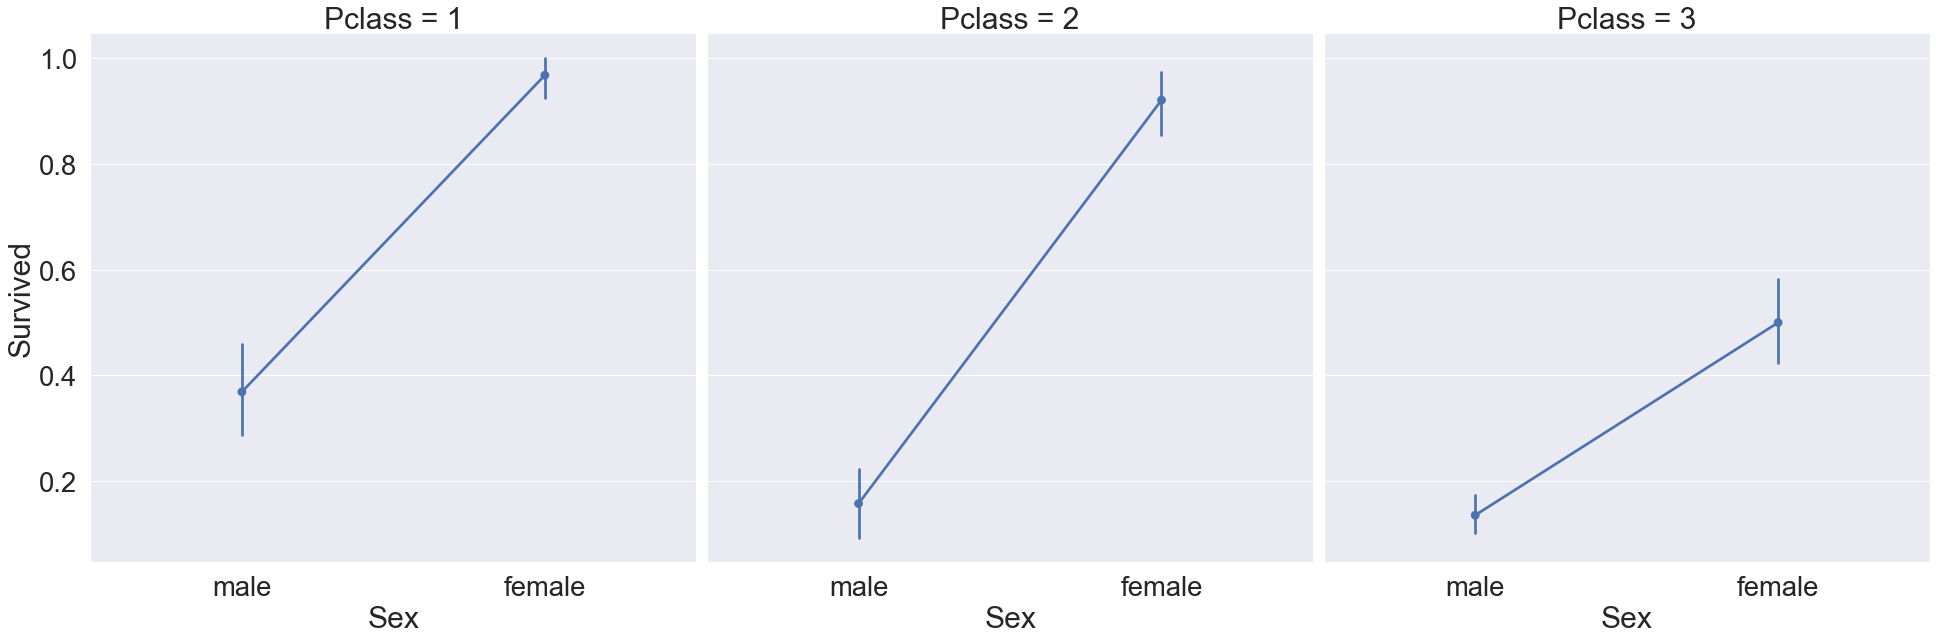

In [21]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

### 2.4 Age

In [22]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 생존에 따른 Age의 histogram을 그려보자.

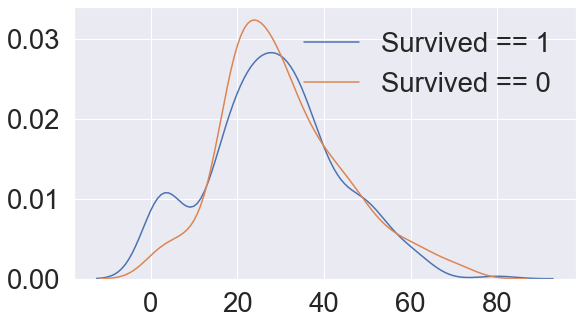

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

-  생존자 중 나이가 어린 경우가 많음을 볼 수 있다.

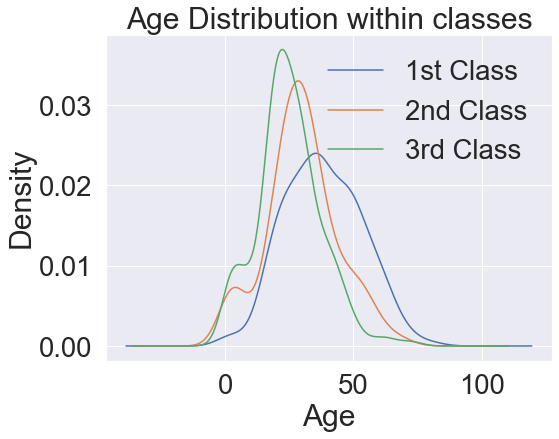

In [24]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Class가 높을수록 나이 많은 사람의 비중이 커진다.
- 나이대가 변하면서 생존률이 어떻게 되는지 볼 수 있다.
- 나이 범위를 점점 넓혀가며, 생존률이 어떻게 되는지 보자. ★ 이해 안 되는 부분

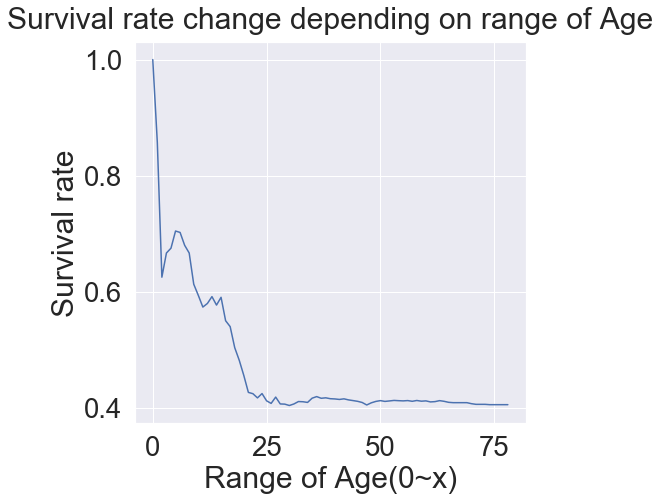

In [25]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴수록 생존률이 확실히 높은 것을 알 수 있다.
- 나이가 중요한 feature 로 쓰일 수 있음을 확인

### 2.5 Pclass, Sex, Age
- 지금까지 본, Pclass, Sex, Age, Survived 모두에 대해서 보고싶다면 seaborn의 violinplot을 사용하여 쉽게 그릴 수 있다.
- x축은 우리가 나눠서 보고 싶어하는 case(여기선 Pclass, Sex)를 나타내고, y축은 보고 싶어하는 distribution(Age)이다.

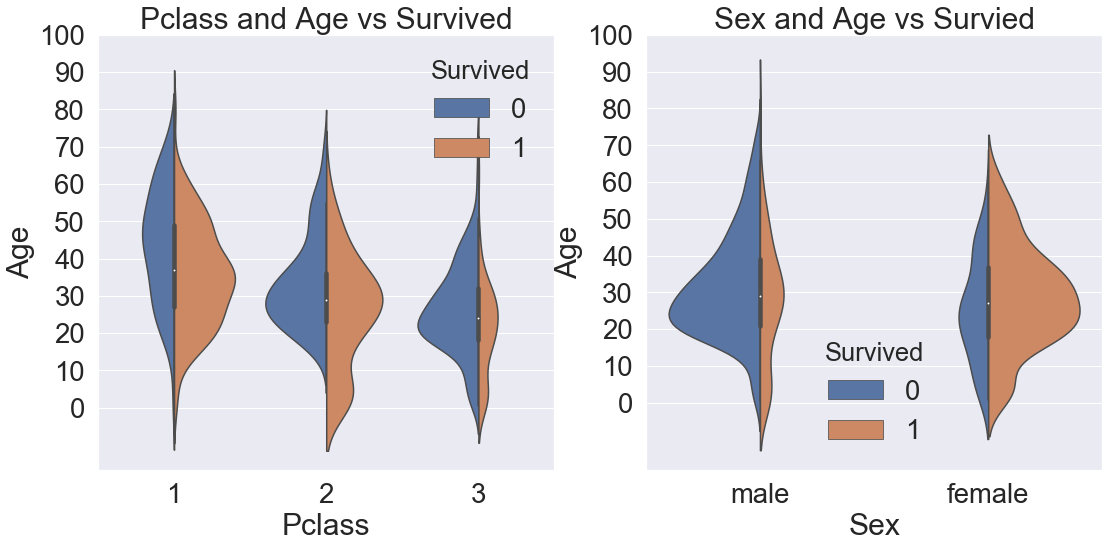

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survied')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 왼쪽은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 따른 생존여부를 구분한 그래프이다.
- 오른쪽도 마찬가지로 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프이다.
- 생존률만 봤을 때, 모든 클래스에서 나이가 어릴수록 생존률이 높은 것을 볼 수 있다.
- 오른쪽 그래프에서, 명확히 여자가 생존률이 높은 것을 볼 수 있다.
- 여성과 아이를 먼저 챙긴 것을 추측할 수 있다.

### 2.6 Embarked
- Embarked는 탑승한 항구를 나타낸다.
- 탑승한 곳에 따른 생존률을 살펴보자.

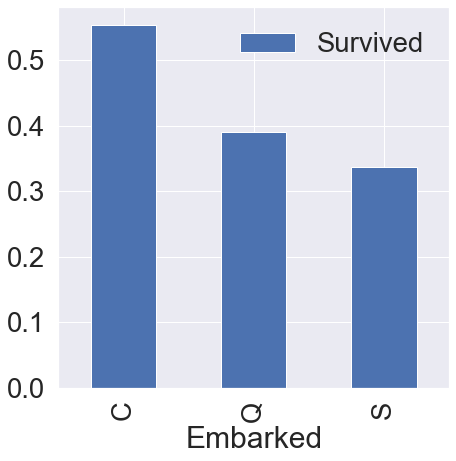

In [27]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- C가 제일 생존률이 높지만, 거의 비슷하다.
- 다른 feature로 split하여 살펴보자.

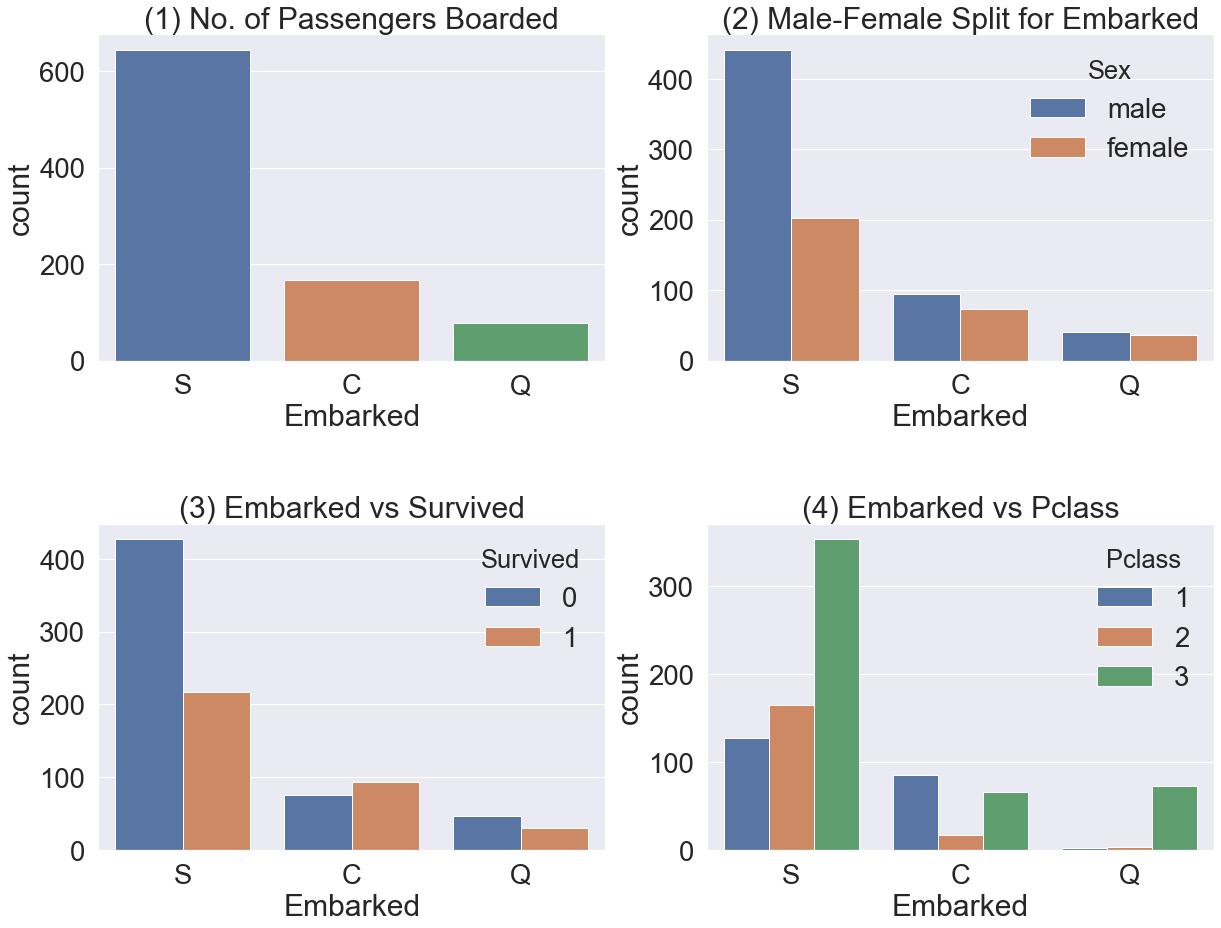

In [28]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했다.
- Figure(2) - C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많다.
- Figure(3) - S의 경우 생존확률이 많이 낮은 걸 볼 수 있다.
- Figure(4) - Class로 split해서 보니, C가 생존확률이 높은 건 클래스가 높은 사람이 많이 탔기 때문이다. S는 3rd class가 많아 생존확률이 낮다.

### 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
- SibSp와 Parch를 합한 Family로 분석해보자.

In [29]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더한다.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더한다.

In [30]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


- FamilySize와 생존의 관계를 살펴보자.

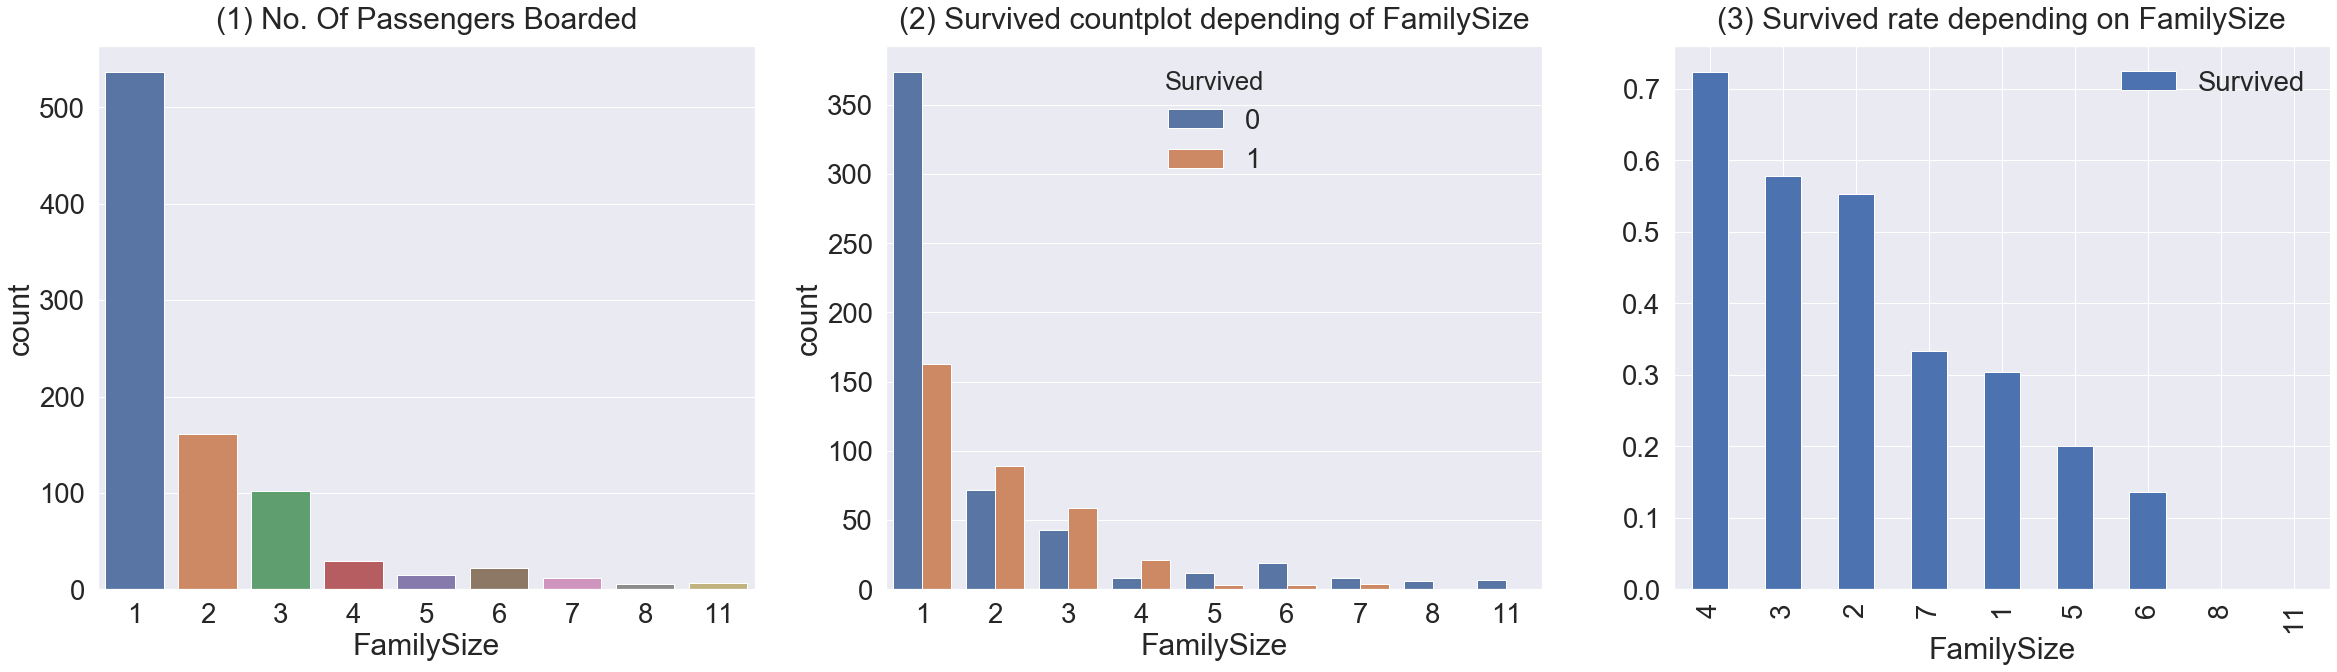

In [31]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending of FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있다. 대부분 1명이고 그 다음으로 2, 3, 4명이다.
- Figure (2), (3) - 가족크기에 따른 생존비교이다. 가족이 4명인 경우가 가장 생존확률이 높다. 가족 수가 많아질수록(5, 6, 7, 8, 11), 생존확률이 낮다. 가족 수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존확률이 낮다. 

### 2.8 Fare
- Fare는 탑승 요금이며, contious feature 이다.

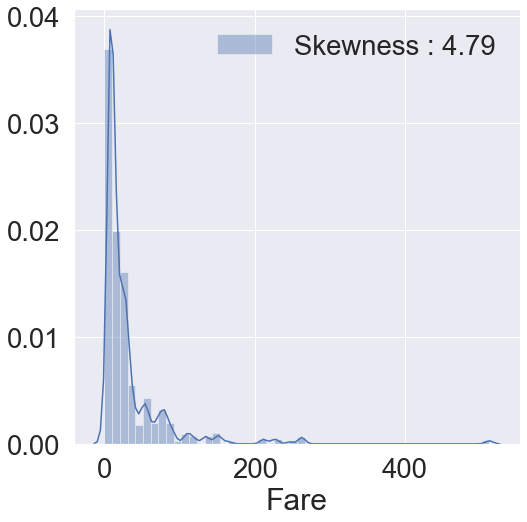

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 비대칭인 것을 알 수 있다(high skewness). 만약 이대로 모델에 넣는다면 자칫 모델이 잘못 학습할 수도 있다. 몇 개 없는 outlier에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수도 있다.
- outlier의 영향을 줄이기 위해 Fare에 log를 취한다. ★
- dataFrame의 특정 columns에 공통된 작업(함수)를 적용하고 싶다면 아래의 map, 또는 apply를 사용하면 손쉽게 적용할 수 있다.
- Fare columns의 데이터 모두를 log 값 취하려면, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면, Fare columns 데이터에 그대로 적용된다.

In [33]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset에 있는 nan value를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

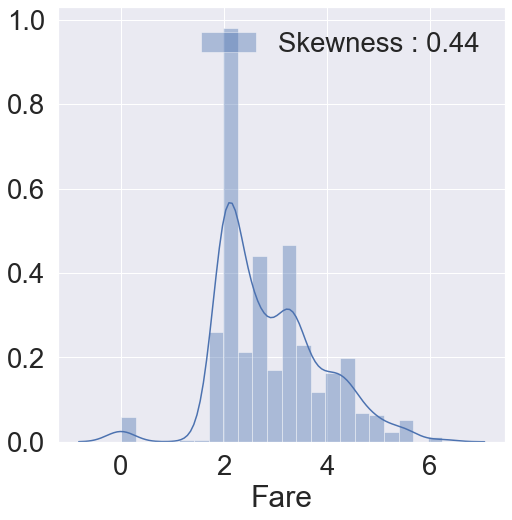

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취하니, 비대칭성이 많이 사라진 것을 볼 수 있다.
- 이러한 작업을 통해, 모델이 좀 더 좋은 성능을 내도록 할 수 있다.
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 한다.

### 2.9 Cabin
- 이 feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기 쉽지 않다.
- 그러므로 모델에 포함시키지 않는다.

In [35]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### 2.10 Ticket
- 이 feature는 NaN이 없다. 일단 string data이므로 어떠한 작업을 해주어야 실제 모델에 사용할 수 있다.

In [36]:
df_train['Ticket'].value_counts()

1601          7
347082        7
CA. 2343      7
347088        6
CA 2144       6
             ..
330931        1
364506        1
A/4. 34244    1
A/4. 20589    1
382649        1
Name: Ticket, Length: 681, dtype: int64

## 3. Feature engineering
- 가장 먼저, dataset에 존재하는 null data를 채운다.
- 아무 숫자로 채울 수는 없고, null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어를 짜내어 채운다.
- null data를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있다.
- Feature engineering은 실제 모델의 학습에 쓰려고 하는 것이므로, train 뿐만 아니라 test도 똑같이 적용해주어야 한다.

### 3.1 Fill Null
### 3.1.1 Fill Null in Age using title ★
- Age의 null data를 채우기 위해 title + statistics를 사용
- 영어에서는 Miss, Mr, Mrs 같은 title이 존재한다. 각 탑승객의 이름에는 꼭 이런 title이 들어가게 되는데 이를 사용
- pandas series에서 data를 string으로 바꿔주는 str method, 거기에 정규표현식을 적용하게 해주는 extract method를 사용하여 title을 추출. 이를 Initial column에 저장한다.

In [37]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

- pandas의 crosstab을 이용하여 우리가 추출한 Initial과 Sex간의 count를 살펴보자.

In [38]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 위 table을 참고하여, 남자, 여자가 쓰는 initial을 구분해 보자.
- replace 메소드를 사용하면, 특정 데이터 값을 원하는 값으로 치환할 수 있다.

In [39]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], \
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], \
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

In [40]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- 여성과 관계있는 Miss, Mr, Mrs가 생존률이 높은 것을 볼 수 있다.

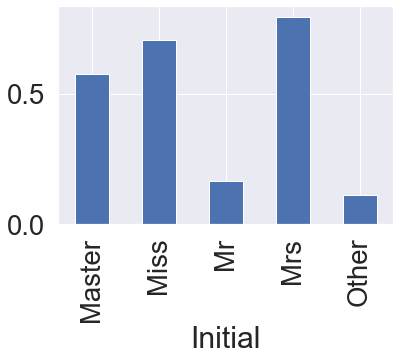

In [41]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- 우리는 언제나 test를 unseen으로 둔 상태로 놔둬야 하며, train에서 얻은 statistics를 기반으로 test의 null data를 채워줘야 한다.

In [42]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age의 평균을 이용해 Null value를 채워보자.
- pandas의 dataframe을 다룰 때에는 boolean array를 이용해 indexing 하는 방법이 편리
- 아래 코드 첫줄을 해석하자면, isnull()이면서 Initial이 Mr인 조건을 만족하는 row(탑승객)의 'Age'의 값을 33으로 치환한다 이다.
- loc + boolean + column을 사용해 값을 치환하는 방법은 자주 쓰이므로 익숙해져야 한다.

In [43]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'), 'Age'] == 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'), 'Age'] == 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'), 'Age'] == 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'), 'Age'] == 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'), 'Age'] == 46

Series([], Name: Age, dtype: bool)

In [44]:
print('Age has ', sum(df_train['Age'].isnull()), 'Null values')
print('Age has ', sum(df_test['Age'].isnull()), 'Null values')

Age has  0 Null values
Age has  86 Null values


### 3.1.2 Fill Null in Embarked

In [45]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has  2 Null values


- Embarked는 Null value가 2개이고, S 에서 가장 많은 탑승객이 있었으므로, 간단하게 Null을 S로 채워보자.
- dataframe의 fillna method를 이용하면 쉽게 채울 수 있다. 여기서 inplace=True로 하면 df_train에 fillna를 실제로 적용하게 된다.

In [46]:
df_train['Embarked'].fillna('S', inplace=True)
print('Embarked has ', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has  0 Null values


### 3.2 Change Age (continuous to categoricla)
- Age는 현재 continuous feature. 이대로 모델로 세울 수 있지만, Age를 몇 개의 group으로 나누어 category화 시켜줄 수 있다.
- continuous를 categorical로 바꾸면 자칫 information loss가 생길 수도 있다.
- 방법은 dataframe의 indexing 방법인 loc를 사용하여 직접해줄 수도 있고, 아니면 apply를 사용해 함수를 넣어줄 수도 있다.
- 첫 번째는 loc를 사용한 방법이고, 나이는 10살 간격으로 나눠 보자.

In [47]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_train['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_train['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_train['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_train['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_train['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_train['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

- 두 번째로 간단한 함수를 만들어 apply 메소드에 넣어주는 방법이다.

In [48]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

- 두 가지 방법이 잘 적용됐다면, 둘 다 같은 결과를 내어야 한다.
- 이를 확인하기 위해 Series간 boolean 비교 후 all() 메소드를 사용한다. all() 메소드는 모든 값이 True면 True, 하나라도 False가 있으면 False를 준다.

In [49]:
print('1번 방법, 2번 방법 둘 다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과를 내면 True 줘야함 ->  True


- 결과는 True 이고, 둘 중 편한 걸 선택
- 이제 중복되는 Age_cat 컬럼과 원래 컬럼 Age를 제거한다.

In [50]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

### 3.3 Change Initial, Embarked and Sex (string to numerical) ★
- 현재 Initial은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있다. 이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋으로 넣어줄 때 우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시키는 것이다.
- map method를 가지고 간단히 할 수 있다.
- 사전 순서대로 정리하여 mapping 해보자.

In [51]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

- Embarked도 C, Q, S로 이루어져 있다. map을 이용해 바꿔보자.
- 그러기 앞서서, 특정 column에 어떤 값들이 있는지 확인할 것이다. 간단히 unique() 메소드를 쓰거나, value_counts()를 써서 count까지 보는 방법이 있다.

In [52]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [53]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

- 위 두 방법을 사용해 Embarked가 S, C, Q 세 가지로 이루어진 것을 볼 수 있다. 이제 map을 사용해보자.

In [54]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

- Null이 사라졌는지 확인해보자. Embarked Column만 가져온 것은 하나의 pandas의 Series 객체므로, isnull() 메소드를 사용해 Series의 값들이 null인지 아닌지에 대한 boolean 값을 얻을 수 있다. 그리고 이것에 any()를 사용하여, True가 단 하나라도 있을 시(Null이 한 개라도 있을 시) True를 반환해주게 된다. 우리는 Null을 S로 다 바꿔주었으므로 False를 얻게 된다.

In [55]:
df_train['Embarked'].isnull().any()

False

- Sex도 Female, male로 이루어져 있다. map을 이용해 바꿔보자.

In [56]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

- 우리는 여러 feature를 가지고 있으니 이를 하나의 matrix 형태로 보면 편할텐데, 이를 heatmap plot이라고 하며, dataframe의 corr() 메소드와 seaborn을 가지고 편하게 그릴 수 있다.

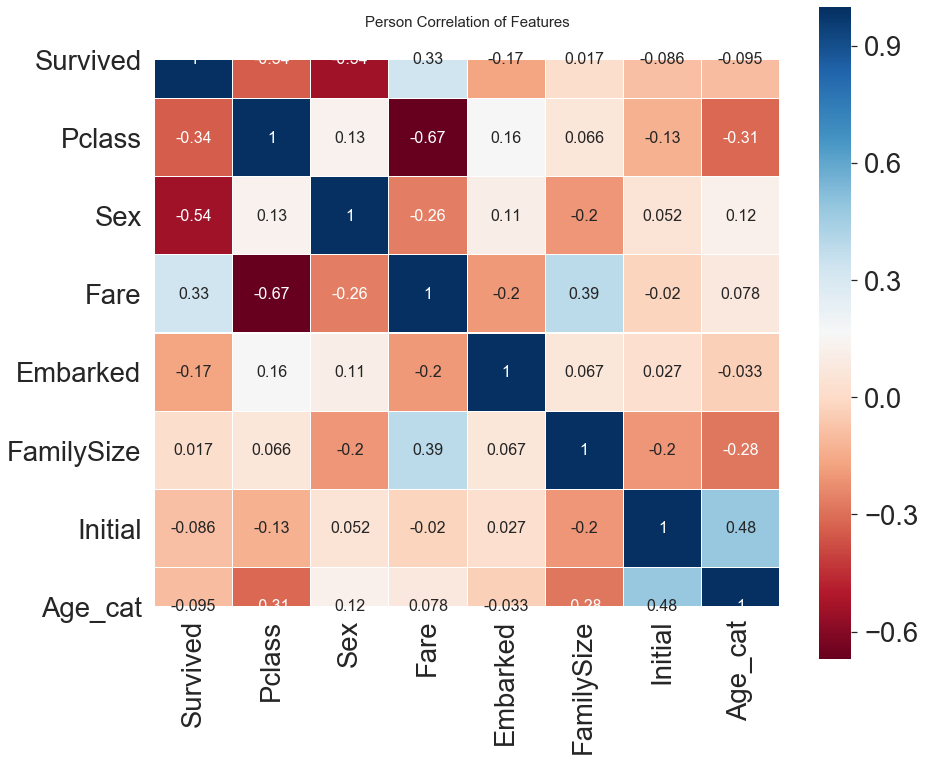

In [57]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Person Correlation of Features', y= 1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16})

del heatmap_data

- 우리가 EDA에서 살펴봤듯이, Sex와 Pclass가 Survived에 상관관계가 어느 정도 있음을 볼 수 있다.
- 생각보다 fare와 Embarked도 상관관계가 있음을 볼 수 있다.
- 또한 우리가 얻을 수 있는 정보는 서로 강한 상관관계를 가지는 feature들이 없다는 것이다.
- 이것은 우리가 모델을 학습시킬 때, 불필요한(redundant, superfluous) feature가 없다는 것을 의미한다. 1 또는 -1의 상관관계를 가진 feature A, B가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일 것이기 때문이다.
- 이제 실제로 모델을 학습시키기 앞서서 data preprocessing (전처리)을 진행해보자.

### 3.4 One-hot encoding on Initial and Embarked ★
- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있다.
- 수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑해주는 것을 말한다.
- One-hot encoding은 위 카테고리를 아래와 같이 (0, 1)로 이루어진 5차원의 벡터로 나타내는 것을 말한다.
- pandas의 get_dummies를 사용하여 쉽게 해결할 수 있다.
- 총 5개의 카테고리니, one-hot encoding을 하고 나면 새로운 5개의 column이 생겨난다.
- Initial을 prefix로 두어서 구분이 쉽게 만들어 준다.

In [58]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [59]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


- 보시다시피 오른쪽에 우리가 만들려고 했던 one-hot encoded columns가 생성된 것이 보인다.
- Embarked에도 적용해보자. Initial 때와 마찬가지로 one-hot encoding을 사용해 표현할 것이다.

In [60]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

### 3.5 Drop columns
- 필요한 columns만 남기고 다 지운다.

In [61]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [62]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [63]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,3,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,3,0,0,0,1,0,0,0,1


- 보다시피, train의 Survived feature(target class)를 빼면 train, test 둘 다 같은 columns를 가진 것을 확인할 수 있다.

## 4. Building machine learning model and predict using the trained model ★

The code I used above is from here. https://kaggle-kr.tistory.com/17#2.5-Pclass,-Sex,-Age, 
https://kaggle-kr.tistory.com/18?category=868316